# Introduction to text mining - part 1

**Basics of text mining: analysis of a set of customer reviews**

Here's a simulated dataset (through GPT-3) of 100 Play Store comments for a fictional mobile application called "HealthTrack." HealthTrack is supposed to be a health and fitness tracking app designed to help users monitor their exercise routines, diet, and overall well-being

In [1]:
import numpy as np
import pandas as pd



In [2]:
#Loading our dataset
df = pd.read_csv("play_store_comments.csv")

In [3]:
df

,User Name,Date,Comment
0,shelby67,2023-05-28,The premium version is worth every penny!
1,aaron71,2023-05-06,The daily tips are informative and practical.
2,rebeccadixon,2022-11-15,I've been using HealthTrack for years and stil...
3,richard22,2023-05-01,The app keeps me accountable for my health.
4,davidwhite,2022-12-21,Great app! Helps me stay on top of my fitness ...
...,...,...,...
95,daniel77,2023-06-10,The daily tips are informative and practical.
96,johnlewis,2023-06-22,I like how it customizes workouts based on my ...
97,caroline82,2023-04-15,This app is a must-have for anyone serious abo...
98,agarcia,2023-07-25,I'm more mindful of what I eat thanks to this ...


In [4]:
#Creating a dataframe copy to perform data processing steps on our data
df_copy = df.copy(deep = True)

In [5]:
#Lowecasing: converting all text to lowercase to ensure consistency
df_copy["Comment"] = df_copy["Comment"].str.lower()

In [6]:
df_copy["Comment"]

0             the premium version is worth every penny!
1         the daily tips are informative and practical.
2     i've been using healthtrack for years and stil...
3           the app keeps me accountable for my health.
4     great app! helps me stay on top of my fitness ...
                            ...                        
95        the daily tips are informative and practical.
96    i like how it customizes workouts based on my ...
97    this app is a must-have for anyone serious abo...
98    i'm more mindful of what i eat thanks to this ...
99    i like how it tracks my heart rate during work...
Name: Comment, Length: 100, dtype: object

In [7]:
#Punctuation removal
#importing the "string" library for punctuation identification
import string 
#Defining a punctuation removal function
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)


In [8]:
#Performing the punctuation removal on our data
df_copy['Comment'] = df_copy['Comment'].apply(remove_punctuation)

In [9]:
df_copy.Comment

0              the premium version is worth every penny
1          the daily tips are informative and practical
2     ive been using healthtrack for years and still...
3            the app keeps me accountable for my health
4     great app helps me stay on top of my fitness g...
                            ...                        
95         the daily tips are informative and practical
96    i like how it customizes workouts based on my ...
97    this app is a musthave for anyone serious abou...
98     im more mindful of what i eat thanks to this app
99    i like how it tracks my heart rate during work...
Name: Comment, Length: 100, dtype: object

In [15]:
print (df_copy.at[0, 'Comment'])
print (df.at[0, 'Comment'])

the premium version is worth every penny
The premium version is worth every penny!


In [16]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [17]:
#Tokenization
#Importing the nltk library for this goal
import nltk
nltk.download('punkt') 
from nltk.tokenize import word_tokenize

#Performing tokenization on our dataset
df_copy['Comment_tokens'] = df_copy['Comment'].apply(word_tokenize)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lakj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [18]:
df_copy

,User Name,Date,Comment,Comment_tokens
0,shelby67,2023-05-28,the premium version is worth every penny,"[the, premium, version, is, worth, every, penny]"
1,aaron71,2023-05-06,the daily tips are informative and practical,"[the, daily, tips, are, informative, and, prac..."
2,rebeccadixon,2022-11-15,ive been using healthtrack for years and still...,"[ive, been, using, healthtrack, for, years, an..."
3,richard22,2023-05-01,the app keeps me accountable for my health,"[the, app, keeps, me, accountable, for, my, he..."
4,davidwhite,2022-12-21,great app helps me stay on top of my fitness g...,"[great, app, helps, me, stay, on, top, of, my,..."
...,...,...,...,...
95,daniel77,2023-06-10,the daily tips are informative and practical,"[the, daily, tips, are, informative, and, prac..."
96,johnlewis,2023-06-22,i like how it customizes workouts based on my ...,"[i, like, how, it, customizes, workouts, based..."
97,caroline82,2023-04-15,this app is a musthave for anyone serious abou...,"[this, app, is, a, musthave, for, anyone, seri..."
98,agarcia,2023-07-25,im more mindful of what i eat thanks to this app,"[im, more, mindful, of, what, i, eat, thanks, ..."


In [19]:
print(df_copy.at[0,'Comment_tokens'])

['the', 'premium', 'version', 'is', 'worth', 'every', 'penny']


In [22]:
#Stopwords removal
#Importing the necessary nltk module
from nltk.corpus import stopwords

#Defining a stopwords removal function:
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    return [word for word in tokens if word.lower() not in stop_words]

#Removing stopwords from my function
df_copy['Comment_tokens'] = df_copy['Comment_tokens'].apply(remove_stopwords)


In [23]:
df_copy

,User Name,Date,Comment,Comment_tokens
0,shelby67,2023-05-28,the premium version is worth every penny,"[premium, version, worth, every, penny]"
1,aaron71,2023-05-06,the daily tips are informative and practical,"[daily, tips, informative, practical]"
2,rebeccadixon,2022-11-15,ive been using healthtrack for years and still...,"[ive, using, healthtrack, years, still, love]"
3,richard22,2023-05-01,the app keeps me accountable for my health,"[app, keeps, accountable, health]"
4,davidwhite,2022-12-21,great app helps me stay on top of my fitness g...,"[great, app, helps, stay, top, fitness, goals]"
...,...,...,...,...
95,daniel77,2023-06-10,the daily tips are informative and practical,"[daily, tips, informative, practical]"
96,johnlewis,2023-06-22,i like how it customizes workouts based on my ...,"[like, customizes, workouts, based, goals]"
97,caroline82,2023-04-15,this app is a musthave for anyone serious abou...,"[app, musthave, anyone, serious, fitness]"
98,agarcia,2023-07-25,im more mindful of what i eat thanks to this app,"[im, mindful, eat, thanks, app]"


In [24]:
print(df_copy.at[0,'Comment_tokens'])

['premium', 'version', 'worth', 'every', 'penny']


In [27]:
#CREATION OF A FREQUENCY TABLE
#Importing the Counter module to count occurrencies
from collections import Counter

#Using a double loop in a list comprehension to put all the words of each comment in a single list
tokens = [token for comment_tokens in df_copy['Comment_tokens'] for token in comment_tokens]

# Create a frequency table for the tokens
word_freq = Counter(tokens)

# Sort the frequency table in descending order
sorted_word_freq = dict(sorted(word_freq.items(), key=lambda x: x[1], reverse=True))

# Transform sorted_word_freq into a DataFrame
word_freq_df = pd.DataFrame.from_dict(sorted_word_freq, orient='index', columns=['Frequency'])

# Reset the index from the df to have words as a separate column
word_freq_df.reset_index(inplace=True)
word_freq_df.rename(columns={'index': 'Word'}, inplace=True)

#Adding relative frequency:
# Calculate the total number of words
total_words = len(tokens)

# Calculate and add the relative frequency as a new column
word_freq_df['Relative Frequency'] = round(word_freq_df['Frequency'] / total_words,2)


In [28]:
# Display the DataFrame with words and their frequencies
print(word_freq_df.head(10))  # Display the top 10 words and their frequencies

          Word  Frequency  Relative Frequency
0  healthtrack         27                0.06
1          app         22                0.05
2         like         13                0.03
3        daily         10                0.02
4      fitness          9                0.02
5        goals          9                0.02
6      feature          9                0.02
7          ive          8                0.02
8         love          8                0.02
9       helped          8                0.02


In [31]:
#pip install wordcloud

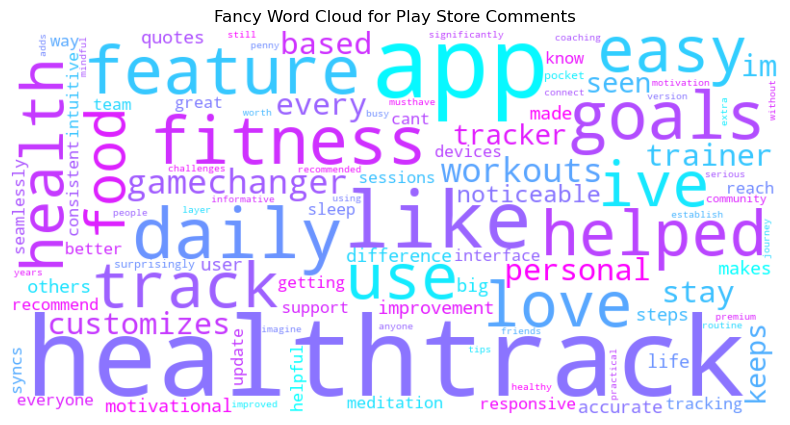

In [32]:
#TEXT DATA VISUALIZATION: DRAWING A WORDCLOUD
#Loading the necessary libraries
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Create a dictionary from the DataFrame with words and their frequencies
word_freq_dict = dict(zip(word_freq_df['Word'], word_freq_df['Frequency']))

# Generate a word cloud with custom styling
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='cool',
    max_words=100,  # Limit the number of words displayed
    contour_color='blue',  # Outline word cloud in blue
    contour_width=2,
    random_state=42  # For reproducibility
)

# Generate the word cloud from the word frequency dictionary
wordcloud.generate_from_frequencies(frequencies=word_freq_dict)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Fancy Word Cloud for Play Store Comments")
plt.show()
